In [1]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.6.0


In [2]:
monster_data = np.genfromtxt('Monster Data.csv', delimiter=',')

In [3]:
monster_data.shape

(797, 13)

In [4]:
monster_data = monster_data[:,:-2]
data_len = 10

In [5]:
np.random.shuffle(monster_data)
#monster_data = np.delete(monster_data,1,1)
monster_train = monster_data[:-160,:]
monster_test = monster_data[637:,:]
monster_train_data = monster_train[:,:-1]
monster_train_label = monster_train[:,data_len]
monster_test_data = monster_test[:,:-1]
monster_test_label = monster_test[:,data_len]

for i in range(len(monster_test_label)):
    if monster_test_label[i] >= 1:
        monster_test_label[i] = monster_test_label[i] + 3
    elif monster_test_label[i] == .13:
        monster_test_label[i] = 1
    elif monster_test_label[i] == .25:
        monster_test_label[i] = 2
    elif monster_test_label[i] == .5:
        monster_test_label[i] = 3
        
for i in range(len(monster_train_label)):
    if monster_train_label[i] >= 1:
        monster_train_label[i] = monster_train_label[i] + 3
    elif monster_train_label[i] == .13:
        monster_train_label[i] = 1
    elif monster_train_label[i] == .25:
        monster_train_label[i] = 2
    elif monster_train_label[i] == .5:
        monster_train_label[i] = 3

In [6]:
model = keras.Sequential()
model.add(keras.layers.Dense(32, input_dim=data_len))
model.add(keras.layers.Dense(64, activation=tf.nn.relu))
model.add(keras.layers.Dense(34, activation=tf.nn.softmax))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                352       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 34)                2210      
Total params: 4,674
Trainable params: 4,674
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [8]:
history = model.fit(monster_train_data,
                    monster_train_label,
                    validation_split=.2,
                   epochs = 50)

Train on 509 samples, validate on 128 samples
Epoch 1/50
509/509 [==============================]509/509 [==============================] - 1s 1ms/step - loss: 10.5890 - acc: 0.1002 - val_loss: 8.8655 - val_acc: 0.1641

Epoch 2/50
509/509 [==============================]509/509 [==============================] - 0s 62us/step - loss: 7.1605 - acc: 0.1591 - val_loss: 6.5009 - val_acc: 0.2188

Epoch 3/50
509/509 [==============================]509/509 [==============================] - 0s 62us/step - loss: 6.2704 - acc: 0.1847 - val_loss: 6.1763 - val_acc: 0.1953

Epoch 4/50
509/509 [==============================]509/509 [==============================] - 0s 62us/step - loss: 5.8817 - acc: 0.2220 - val_loss: 5.9216 - val_acc: 0.1953

Epoch 5/50
509/509 [==============================]509/509 [==============================] - 0s 62us/step - loss: 5.8050 - acc: 0.2279 - val_loss: 5.9173 - val_acc: 0.2109

Epoch 6/50
509/509 [==============================]509/509 [========================

509/509 [==============================]509/509 [==============================] - 0s 63us/step - loss: 5.3014 - acc: 0.3949 - val_loss: 5.5413 - val_acc: 0.3359

Epoch 48/50
509/509 [==============================]509/509 [==============================] - 0s 64us/step - loss: 5.2977 - acc: 0.3890 - val_loss: 5.5925 - val_acc: 0.2656

Epoch 49/50
509/509 [==============================]509/509 [==============================] - 0s 65us/step - loss: 5.2831 - acc: 0.3870 - val_loss: 5.5786 - val_acc: 0.2578

Epoch 50/50
509/509 [==============================]509/509 [==============================] - 0s 65us/step - loss: 5.3155 - acc: 0.3851 - val_loss: 5.6697 - val_acc: 0.3047



In [9]:
results = model.evaluate(monster_test_data, monster_test_label)

print(results)

160/160 [==============================]160/160 [==============================] - 0s 43us/step

[nan, 0.3125]


In [10]:
history_dict = history.history
history_dict.keys()

['acc', 'loss', 'val_acc', 'val_loss']

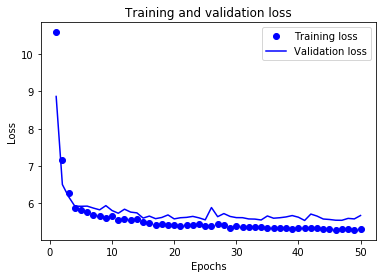

In [11]:
plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

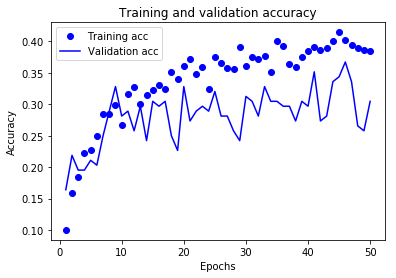

In [12]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [13]:
predictions = model.predict(monster_test_data)

In [14]:
predictions[0]

array([5.37444269e-15, 1.40241443e-10, 1.82027859e-09, 1.84697456e-06,
       7.41897500e-04, 1.49000250e-03, 4.61011790e-02, 1.75239936e-01,
       7.36245573e-01, 5.11927498e-24, 6.70324615e-20, 7.41934754e-17,
       1.91350397e-15, 3.07938960e-16, 2.16959752e-02, 4.92986410e-18,
       2.41581473e-16, 1.04960731e-13, 1.61328465e-02, 5.99078450e-20,
       5.84741283e-12, 9.10422564e-16, 2.52673858e-13, 4.01784508e-12,
       3.43962335e-15, 1.89633720e-18, 2.34341901e-03, 3.71469211e-17,
       2.44147718e-16, 1.05111093e-11, 7.39667530e-06, 9.45157039e-14,
       1.11452175e-20, 1.01081071e-11], dtype=float32)

In [15]:
np.argmax(predictions[0])

8

In [16]:
monster_test_label[0]

10.0